## Assignment 4 (10 Points): Relational Data, Strings, Factors, and Dates

In [1]:
library("tidyverse")
library("nycflights13")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
my_print = function(df)
{
    bind_rows(head(df, 2),
    sample_n(df, 1),
    tail(df, 2))
}

### Q1 (2.5 points): Reverse engineer the following figure using the data frames included in the nycflights13 package.


In [3]:
join_Data <- flights %>% left_join(airlines, by = "carrier") %>%
                            left_join(planes, by = "tailnum") %>% 
                    group_by(manufacturer, name) %>% 
                    summarise(count = n())

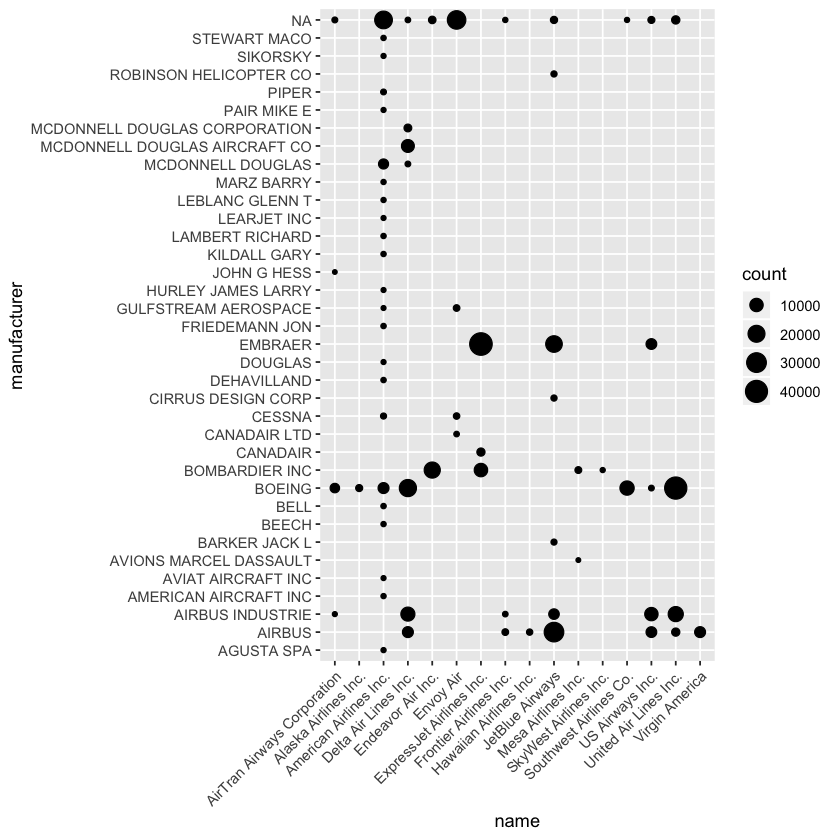

In [4]:
join_Data %>% ggplot(aes(name, manufacturer)) +
                geom_count(aes(size = count)) +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Q2 (2.5 points): Reverse engineer the following output using regular expressions and the sentences dataset.

In [7]:
noun <- "(?<=a|the|The|A) ([^ ]+)"
str_replace_all(sentences, noun, "___") %>%
head(20) %>% print()

 [1] "The___ canoe slid on the___ planks."      
 [2] "Glue the___ to the___ blue background."   
 [3] "It's easy to tell the___ of a___"         
 [4] "These days a___ leg is a___ dish."        
 [5] "Rice is often served in round bowls."     
 [6] "The___ of lemons makes fine punch."       
 [7] "The___ was thrown beside the___ truck."   
 [8] "The___ were fed chopped corn and garbage."
 [9] "Four hours of steady work faced us."      
[10] "Large size in stockings is hard to sell." 
[11] "The___ was there when the___ rose."       
[12] "A___ is used to catch pink salmon."       
[13] "The___ of the___ river is the___ spring." 
[14] "Kick the___ straight and follow through." 
[15] "Help the___ get back to her feet."        
[16] "A___ of tea___ to pass the___"            
[17] "Smoky fires lack flame and heat."         
[18] "The___ cushion broke the___ fall."        
[19] "The___ breeze came across from the___"    
[20] "The___ at the___ sold fifty bonds."       


### Q3 (2.5 points): Reverse engineer the following figure using the gss_cat dataset.

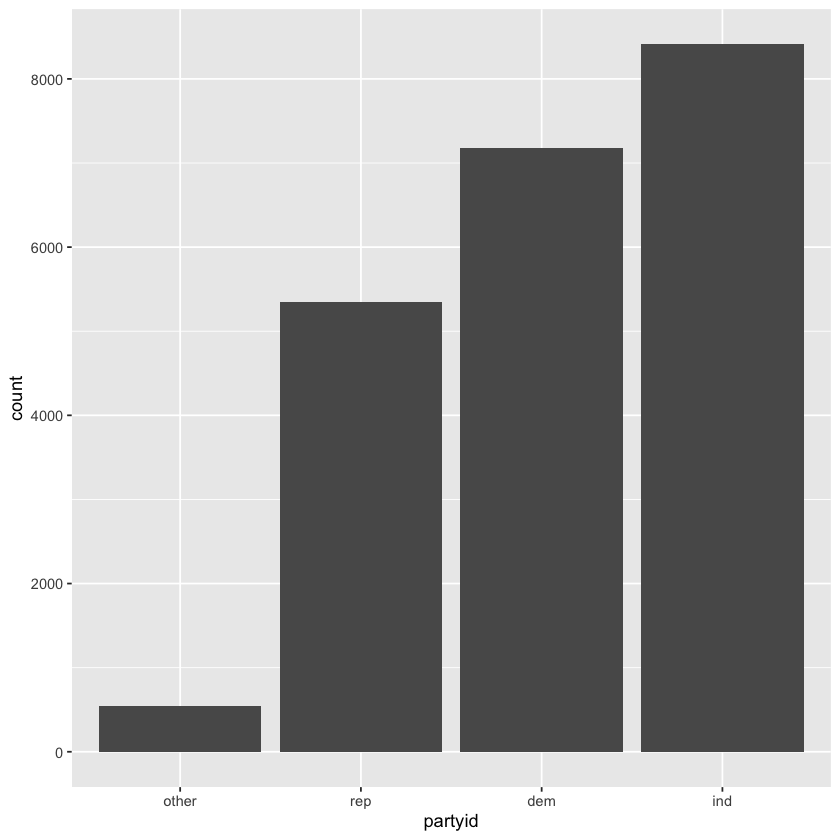

In [8]:
gss_cat %>%
    mutate(partyid = fct_recode(partyid,
        "rep" = "Strong republican", 
        "rep" = "Not str republican", 
        "ind" = "Independent",
        "ind" = "Ind,near rep", 
        "ind" = "Ind,near dem",
        "dem" = "Not str democrat",
        "dem" = "Strong democrat",
        "other" = "No answer",
        "other" = "Don't know",
        "other" = "Other party")) %>%
count(partyid) %>% arrange(n) %>% ggplot() + 
geom_col(aes(reorder(partyid, n), y=n)) + xlab('partyid') + ylab('count')

### Q4 (2.5 points): Reverse engineer the following output using the flights dataset.

In [6]:
flights <- flights %>% mutate(date = make_date(year, month, day))
flights <- flights %>% filter (!is.na(arr_time), !is.na(dep_time))
flights <- flights %>% mutate(dep_week_day = wday(date, label = TRUE))
flights %>% group_by(dep_week_day) %>% summarise(count = n())

dep_week_day,count
Sun,45583
Mon,49398
Tue,49223
Wed,48753
Thu,48568
Fri,48642
Sat,37896


### End.